In [110]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
import datetime as dt

# Matplotlib
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [111]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [112]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [113]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

session.query(Measurement.tobs, Measurement.date).filter(func.strftime("%m",Measurement.date) == "05").all()



[(77.0, '2010-05-01'),
 (73.0, '2010-05-02'),
 (74.0, '2010-05-03'),
 (76.0, '2010-05-04'),
 (76.0, '2010-05-05'),
 (80.0, '2010-05-06'),
 (74.0, '2010-05-07'),
 (77.0, '2010-05-08'),
 (77.0, '2010-05-09'),
 (76.0, '2010-05-10'),
 (77.0, '2010-05-11'),
 (78.0, '2010-05-13'),
 (78.0, '2010-05-14'),
 (75.0, '2010-05-15'),
 (73.0, '2010-05-16'),
 (77.0, '2010-05-17'),
 (76.0, '2010-05-18'),
 (77.0, '2010-05-19'),
 (77.0, '2010-05-21'),
 (78.0, '2010-05-22'),
 (75.0, '2010-05-23'),
 (77.0, '2010-05-24'),
 (77.0, '2010-05-25'),
 (77.0, '2010-05-26'),
 (76.0, '2010-05-27'),
 (75.0, '2010-05-28'),
 (77.0, '2010-05-29'),
 (77.0, '2010-05-30'),
 (77.0, '2010-05-31'),
 (77.0, '2011-05-01'),
 (77.0, '2011-05-02'),
 (70.0, '2011-05-03'),
 (76.0, '2011-05-04'),
 (74.0, '2011-05-05'),
 (72.0, '2011-05-06'),
 (74.0, '2011-05-07'),
 (73.0, '2011-05-08'),
 (75.0, '2011-05-09'),
 (75.0, '2011-05-10'),
 (75.0, '2011-05-11'),
 (76.0, '2011-05-12'),
 (77.0, '2011-05-13'),
 (78.0, '2011-05-14'),
 (77.0, '20

In [114]:
#  3. Convert the June temperatures to a list.
june_temperatures = session.query(Measurement.tobs).filter(func.strftime("%m",Measurement.date) == "05").all()
type(june_temperatures)

list

In [115]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temperatures, columns = ['June Temps'])
june_df

,June Temps
0,77.0
1,73.0
2,74.0
3,76.0
4,76.0
...,...
1728,75.0
1729,72.0
1730,72.0
1731,73.0


In [116]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1733.000000
mean,73.680900
std,3.355783
min,63.000000
25%,71.000000
50%,74.000000
75%,76.000000
max,87.000000


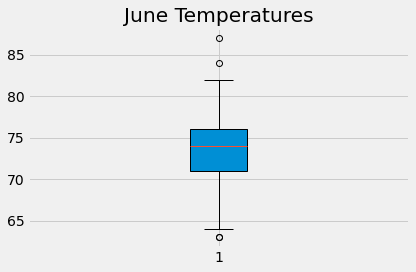

In [147]:
fig, ax = plt.subplots()

ax.boxplot(june_df, patch_artist=True)
ax.set_title('June Temperatures')
fig.tight_layout()
plt.show()


## D2: Determine the Summary Statistics for December

In [102]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.tobs, Measurement.date).filter(func.strftime("%m",Measurement.date) == "12").all()

[(76.0, '2010-12-01'),
 (74.0, '2010-12-03'),
 (74.0, '2010-12-04'),
 (64.0, '2010-12-06'),
 (64.0, '2010-12-07'),
 (67.0, '2010-12-08'),
 (77.0, '2010-12-09'),
 (66.0, '2010-12-10'),
 (69.0, '2010-12-11'),
 (68.0, '2010-12-12'),
 (68.0, '2010-12-13'),
 (71.0, '2010-12-14'),
 (74.0, '2010-12-15'),
 (67.0, '2010-12-16'),
 (66.0, '2010-12-17'),
 (69.0, '2010-12-18'),
 (71.0, '2010-12-19'),
 (70.0, '2010-12-23'),
 (70.0, '2010-12-24'),
 (74.0, '2010-12-26'),
 (74.0, '2010-12-27'),
 (71.0, '2010-12-28'),
 (75.0, '2010-12-29'),
 (75.0, '2010-12-30'),
 (72.0, '2010-12-31'),
 (69.0, '2011-12-01'),
 (68.0, '2011-12-02'),
 (73.0, '2011-12-03'),
 (74.0, '2011-12-04'),
 (73.0, '2011-12-05'),
 (73.0, '2011-12-06'),
 (73.0, '2011-12-07'),
 (73.0, '2011-12-08'),
 (71.0, '2011-12-09'),
 (73.0, '2011-12-10'),
 (73.0, '2011-12-11'),
 (77.0, '2011-12-12'),
 (72.0, '2011-12-13'),
 (71.0, '2011-12-14'),
 (73.0, '2011-12-15'),
 (70.0, '2011-12-16'),
 (73.0, '2011-12-17'),
 (69.0, '2011-12-18'),
 (74.0, '20

In [103]:
# 7. Convert the December temperatures to a list.
dec_temperatures = session.query(Measurement.tobs).filter(func.strftime("%m",Measurement.date) == "12").all()
type(dec_temperatures)

list

In [104]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_temperatures, columns = ['December Temps'])

In [105]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


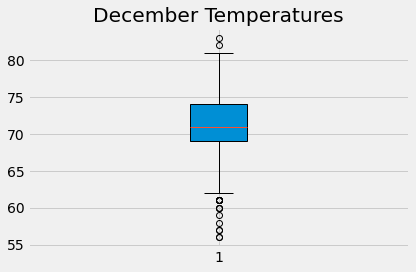

In [119]:
fig, ax = plt.subplots()

ax.boxplot(dec_df, patch_artist=True)
ax.set_title('December Temperatures')
fig.tight_layout()
plt.show()

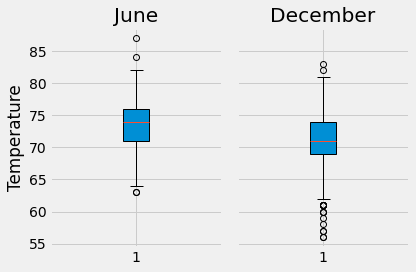

In [146]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)
labels = ['June', 'December']
ax1.boxplot(june_df,vert=True, patch_artist=True)
ax1.set_title('June')
ax2.boxplot(dec_df, vert=True, patch_artist=True)
ax2.set_title('December')
ax1.set_ylabel('Temperature')


fig.tight_layout()
plt.show()